# Лабораторная работа №1
## Анализ пассажиров корабля "Титаник"

**Заполните недостающий код ("You code here")**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

** Чтение данных в Pandas DataFrame**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Первые 5 строк**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Давайте выберем тех пассажиров, которые отправились в Cherbourg (Embarked = C) и заплатили > 200 фунтов за билет (fare > 200).**

Убедитесь, что вы понимаете, как на самом деле работает эта конструкция.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


** Мы можем отсортировать этих людей по тарифу (Fare) в порядке убывания. **

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Давайте добавим новый признак.**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

**Другой способ сделать это с `apply`.**

In [9]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин было на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [10]:
# You code here
print(f"{len(data[data['Sex'] == 'male'])} мужчин и {len(data[data['Sex'] == 'female'])} женщин")

577 мужчин и 314 женщин


**2. Определите распределение функции `Pclass`. Теперь Для мужчин и женщин отдельно. Сколько людей из второго класса было на борту?**
- 104
- 108
- 112
- 125

108


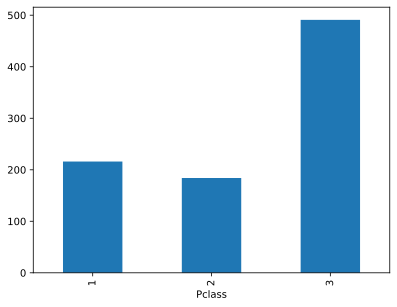

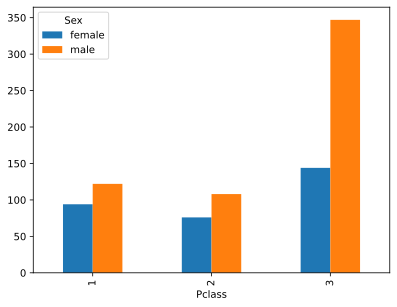

In [11]:
# You code here
count_class_sex = data.groupby(['Pclass', 'Sex']).size().unstack()
data['Pclass'].value_counts().sort_index().plot(kind='bar')
count_class_sex.plot(kind='bar')
print(count_class_sex['male'][2])

**3. Каковы медиана и стандартное отклонение`Fare`?. Округлите до 2-х знаков после запятой.**
- медиана 14,45, стандартное отклонение 49,69
- медиана 15,1, стандартное отклонение 12,15
- медиана 13,15, стандартное отклонение 35,3
- Медиана 17,43, стандартное отклонение - 39,1.

In [12]:
# You code here
print(f"медиана {round(data['Fare'].median(), 2)} и стандартное отклонение {round(data['Fare'].std(), 2)}")

медиана 14.45 и стандартное отклонение 49.69


** 4. Правда ли, что средний возраст выживших людей выше, чем у пассажиров, которые в конечном итоге умерли? **
- Да
- Нет


In [13]:
# You code here
if data.query('Survived == 1')['Age'].mean() > data.query('Survived == 0')['Age'].mean():
    print('Да')
else:
    print('Нет')

Нет


**5. Это правда, что пассажиры моложе 30 лет. выжили чаще, чем те, кому больше 60 лет. Каковы доли выживших людей среди молодых и пожилых людей?**
- 22,7% среди молодежи и 40,6% среди пожилых
- 40,6% среди молодежи и 22,7% среди пожилых
- 35,3% среди молодежи и 27,4% среди пожилых
- 27,4% среди молодежи и 35,3% среди пожилых

In [14]:
# You code here
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories
percents = data.groupby(['Survived', 'Age_category']).size().unstack()
print(f'{round(percents[1][1] * 100 / percents[1].sum(), 1)}% среди молодежи и '
      f'{round(percents[3][1] * 100 / percents[3].sum(), 1)}% среди пожилых')

40.6% среди молодежи и 31.0% среди пожилых


**6. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших людей среди мужчин и женщин?**
- 30,2% среди мужчин и 46,2% среди женщин
- 35,7% среди мужчин и 74,2% среди женщин
- 21,1% среди мужчин и 46,2% среди женщин
- 18,9% среди мужчин и 74,2% среди женщин

In [15]:
# You code here
percents = data.groupby(['Survived', 'Sex']).size().unstack()
print(percents['male'])
print(f"{round(percents['male'][1] * 100 / percents['male'].sum(), 1)}% среди молодежи и "
      f"{round(percents['female'][1] * 100 / percents['female'].sum(), 1)}% среди пожилых")

Survived
0    468
1    109
Name: male, dtype: int64
18.9% среди молодежи и 74.2% среди пожилых


**7. Какое имя наиболее популярно среди пассажиров мужского пола?**
- Charles
- Thomas
- William
- John

In [16]:
# You code here
male_names = [name.split()[-2] if len(name.split()) == 4 else
              name.split()[-1] for name in data[data['Sex'] == 'male']['Name']]
popular_male_name = max(set(male_names), key=male_names.count)
print(f'Самое популярное мужское имя: {popular_male_name}')

Самое популярное мужское имя: William


**8. Как средний возраст мужчин / женщин зависит от `Pclass`? Выберите все правильные утверждения:**
- В среднем мужчины 1 класса старше 40 лет
- В среднем женщины 1 класса старше 40 лет
- Мужчины всех классов в среднем старше, чем женщины того же класса
- В среднем, пассажиры первого класса старше, чем пассажиры 2-го класса, которые старше, чем пассажиры 3-го класса.

In [17]:
# You code here
mens_means = data.groupby(['Pclass', 'Sex'])['Age'].mean().unstack()['male']
womens_means = data.groupby(['Pclass', 'Sex'])['Age'].mean().unstack()['female']
passengers_means = data.groupby('Pclass')['Age'].mean()

print("Первое утверждение", "верно" if mens_means[1] > 40 else "неверно")
print("Второе утверждение", "верно" if womens_means[1] > 40 else "неверно")
print("Третье утверждение", "верно" if all(mens_means > womens_means) else "неверно")
print("Четвёртое утверждение", "верно" if all(np.diff(passengers_means) > 0) else "неверно")

plt.show(block=True)

Первое утверждение верно
Второе утверждение неверно
Третье утверждение верно
Четвёртое утверждение неверно



Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.